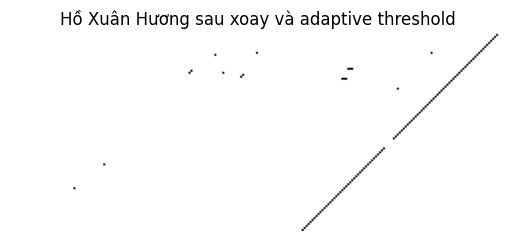

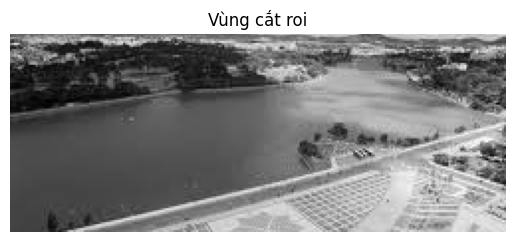

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. Đọc ảnh
img_path = os.path.join("excercise", 'DaLat2.jpg')
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError("Không tìm thấy ảnh DaLat2.jpg trong thư mục exercise")

# 2. Chuyển sang ảnh xám
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Chọn vùng hồ Xuân Hương (tọa độ mẫu - bạn có thể thay đổi nếu cần)
x, y, w, h = 0, 50, 250, 100 # ví dụ toạ độ hồ
roi = gray[y:y+h, x:x+w]

# 4. Xoay vùng chọn 45 độ (reshape=False để giữ kích thước gốc)
(h_roi, w_roi) = roi.shape
center = (w_roi // 2, h_roi // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(roi, M, (w_roi, h_roi), flags=cv2.INTER_LINEAR)

# 5. Áp dụng Adaptive Thresholding
# Phải đảm bảo ảnh là kiểu uint8
adaptive = cv2.adaptiveThreshold(
    rotated, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    blockSize=11,  # khối lân cận
    C=60  # giá trị ngưỡng bị trừ đi
)

# 6. Lưu và hiển thị
output_path = "ho_xuan_huong.jpg"
cv2.imwrite(output_path, adaptive)

plt.imshow(adaptive, cmap='gray')
plt.title("Hồ Xuân Hương sau xoay và adaptive threshold")
plt.axis('off')
plt.show()
plt.imshow(roi, cmap='gray')
plt.title("Vùng cắt roi")
plt.axis('off')
plt.show()